Εργασία *Αναλυτικής Μεγάλων Δεδομένων* <br>
Eξάμηνο: $9^{ο}$ <br>
Θέμα: **Instagram**<br>

Ασημακόπουλος Παναγιώτης <font color='red'>**91819**</font><br>
Καραδουλαμας Δημήτριος <font color='red'>**91786**</font>

Για την ομαλή λειτουργία του Instagram απαιτείται μία βάση δεδομένων.<br>
- Το Instagram διαθέτει χρήστες. Με σκοπό να χρησιμοποιήσουν την εφαρμογή, οι χρήστες πρέπει να εισάγουν το email τους, το ονοματεπώνυμό τους, το φύλο και το username τους. Μετά την εισαγωγή των στοιχείων τους, το Instagram δημιουργεί ένα μοναδικό ID.
- Οι χρήστες μπορούν να ακολουθήσουν άλλους χρήστες και μπορούν να δουν ποιους ακολουθούν καθώς και ποιοι άλλοι χρήστες τους ακολουθούν.
- Επίσης, οι χρήστες μπορούν να συνομιλούν και να ανταλλάσουν μηνύματα μεταξύ τους.
- Έπειτα, οι χρήστες μπορούν να κάνουν δημοσιέυσεις (posts) τα οποία είναι είτε φωτογραφία, είτε βίντεο, έχουν λεζάντα, αναγράφεται ο αριθμός των χρηστών στους οποίους αρέσει η δημοσίευση, ο αριθμός των σχολίων και η ημερομηνία δημοσίευσης.
- Μία δημοσίευση μπορεί να έχει σχόλια από άλλους χρήστες σε μορφή κειμένου όπου φαίνεται ο χρήστης που σχολίασε.
- Ακόμα, ένας χρήστης μπορεί να έχει εταιρικό προφίλ. Αν έχει, τότε δημιουργείται ένα ID για το εταιρικό προφίλ και επίσης φαίνεται ο τύπος της επιχείρησης, και ο υπερσύνδεσμος για να παραπέμψει τους χρήστες στην επίσημη ιστοσελίδα.
- Μέσω του εταιρικού προφίλ μπορούν να πωληθούν προϊόντα. Στα προϊόντα αναγράφονται ο κωδικός του προϊόντος, η περιγραφή του και το κόστος του.

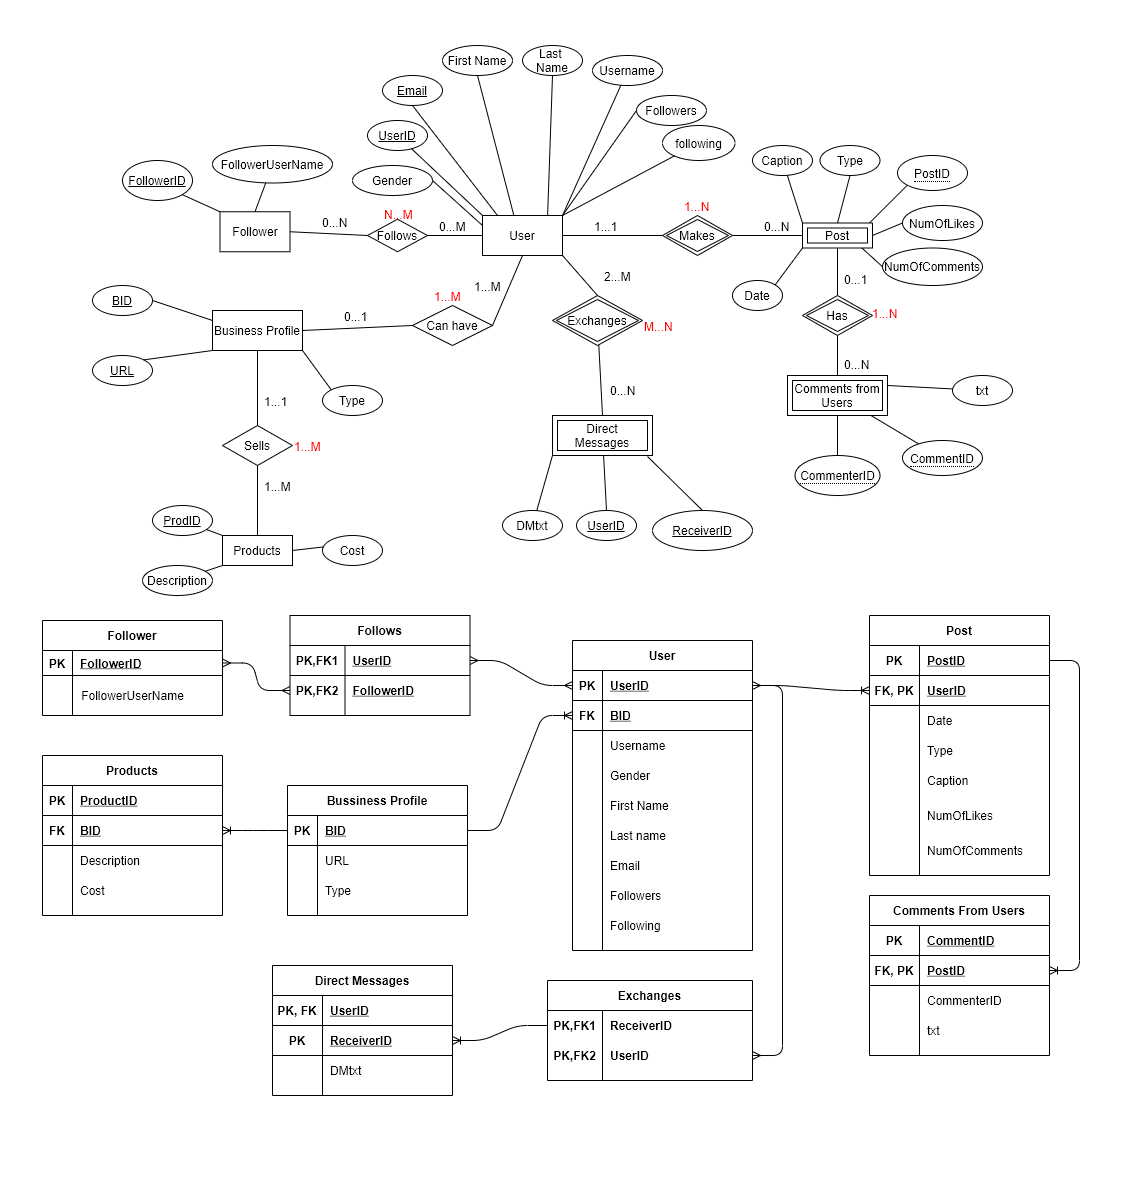

In [1]:
%load_ext sql
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import numpy as np
%sql sqlite:///instagram.db

'Connected: @instagram.db'

In [2]:
%%sql
CREATE TABLE User(UserID varchar(6) not null,BID varchar(7) not null,Email varchar(25) not null,Gender char(1),FirstName char(15),LastName char(15),username varchar(20),Following number not null, Followers number not null,PRIMARY KEY(UserID,username),FOREIGN KEY(BID) REFERENCES BussinessProfile(BID));
CREATE TABLE FOLLOWS(UserID varchar(6) not null,FollowerID number not null, PRIMARY KEY (UserID,FollowerID), FOREIGN KEY (UserID) REFERENCES User(UserID), FOREIGN KEY(FollowerID)REFERENCES Follower(FollowerID) );
CREATE TABLE POST(UserID varchar(6) not null,PostID number not null,Date DATE,Type char,caption Char,NumOfLikes number, NumOfComments number,PRIMARY KEY(PostID),FOREIGN KEY(UserID)REFERENCES User(UserID));
CREATE TABLE Comments_from_users(PostID number not null,CommentID number not null,commenterID,txt char(30),PRIMARY KEY(PostID,CommentID),FOREIGN KEY(PostID)REFERENCES POST(PostID));
CREATE TABLE Follower(FollowerID number,FollowerUserName varchar(15),PRIMARY KEY (FollowerID));
CREATE TABLE Exchanges(ReceiverID number not null,UserID number not null,PRIMARY KEY (ReceiverID,UserID),FOREIGN KEY(ReceiverID) REFERENCES DirectMessages(ReceiverIDID),FOREIGN KEY(UserID) REFERENCES User(UserID) );
CREATE TABLE DirectMessages(UserID varchar(6) not null,ReceiverID number not null,DMtxt varchar(50),PRIMARY KEY (ReceiverID,UserID),FOREIGN KEY(UserID) REFERENCES User(UserID));
CREATE TABLE bussinessProfile(BID varchar(7) not null,URL char(23),type char(10),PRIMARY KEY(BID));
CREATE TABLE Products(ProductID varchar,BID varchar,Description varchar(20),cost number not null,PRIMARY KEY(ProductID),FOREIGN KEY(BID) REFERENCES bussinessProfile(BID));


 * sqlite:///instagram.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [3]:
%%sql 
insert into user values ('445485','-','biggusdickus@gmail.com','M','Biggus', 'Dickus', 'biggusD',14360,21920);
insert into user values ('882437','-','constasix@gmail.com','M','Constatine','Palaiologos','constantineXI',11453,19780);
insert into user values ('522821','-','keanur@outlook.com','M','Keanu','Reeves','Keanus_Reeves',14100,72452);
insert into user values ('816336','-','sandyb@outlook.com','F','Sandra','Bullock','Sandra_Bullock',7000,53540);
insert into user values ('372692','-','jimarascf@gmail.com','M','Dimitrios','Karadoulamas','dimitriskaar',8720,12810);
insert into user values ('985600','-','panosa10@gmail.com','M','Panagiotis','Asimakopoulos','panosasimak',5080,3840);
insert into user values ('269572','B269572','zarasales@outlook.com','-','-','-','Zara',4690,90025);
insert into user values ('975569','B975569','publicsales@outlook.com','-','-','-','public_stores',1214,57053);
insert into user values ('768894','-','mpapad08@gmail.com','F','Maria','Papadopoulou','mpapad08',1180,5320);
insert into user values ('442498','B442498','paoksales@outlook.com','-','-','-','paok_fc',11890,32076);
insert into user values ('242996','-','steventh@gmail.com','M','Steven','Thomson','StevenTH',5890,2990);
insert into user values ('842996','-','marazza12@gmail.com','F','Maria','Soul','marazza',3490,4799);
insert into follows values ('445485',605005);
insert into follows values ('882437',316092);
insert into follows values ('522821',816336);
insert into follows values ('816336',522821);
insert into follows values ('372692',985600);
insert into follows values ('985600',372692);
insert into follows values ('269572',276984);
insert into follows values ('975569',236106);
insert into follows values ('768894',826072);
insert into follows values ('442498',956732);
insert into POST values('445485',44548512,'1/26/2021','P','When In Wome, do as the Womans do',1544,3);
insert into POST values('882437',88243740,'1/20/2021','V','Let us die for our faith in Christ and for our fatherland',1453,4);
insert into POST values('522821',52282120,'1/16/2021','V','Youre Breathtaking!',234693,621);
insert into POST values('816336',81633613,'1/10/2021','P','Speed 3 on 2021!',198539,530);
insert into POST values('372692',37269221,'1/1/2021','V','The Londons nice, but like Chalkidiki it doesnt have, vol. 1',200,3);
insert into POST values('985600',98560010,'12/31/2020','P','10 Seconds',146,2);
insert into POST values('269572',26957241,'7/31/2020','P','Warm outside. Wool Blend dress limited edition',32325,200);
insert into POST values('975569',97556951,'2/14/2019','V','Όλες οι φιγούρες είναι στο Public. Μπορείς να αναγνωρίσεις ποιος είναι στη φωτογραφία;',4015,96);
insert into POST values('768894',76889433,'1/1/2019','P','Bestieeees. Frendship goaaals!',311,7);
insert into POST values('442498',44249841,'1/27/2021','P','Kagawa Is Here',26267,544);
insert into POST values('522821',52282126,'6/18/2017','V','My matrix2 stunt',134693,326);
insert into POST values('522821',52282115,'9/12/2020','P','anyone hyped for john wick 4?',184693,431);
insert into POST values('522821',52282110,'6/7/2020','P','Everyone have a nice summer',104693,220);
insert into POST values('522821',52282101,'6/3/2016','P','This is my first instagram post?',4693,91);
insert into POST values('522821',52282105,'9/30/2017','P','Should i change my name to NEO?',18693,190);
insert into Comments_from_users values(44548512,445485121,351754,'Lmaoooo');
insert into Comments_from_users values(88243740,882437402,226109,'Giga chad!');
insert into Comments_from_users values(52282120,522821205,824202,'Make Matrix 4 already');
insert into Comments_from_users values(81633613,8163361312,656035,'Niceeee!');
insert into Comments_from_users values(37269221,372692211,377485,'Αρχίσαμε...');
insert into Comments_from_users values(98560010,985600101,574923,'Mission Impossible κατέληξε');
insert into Comments_from_users values(26957241,269572411,330540,'Neat boots. Are they in NZ?');
insert into Comments_from_users values(97556951,975569513,861124,'Vegetaaa');
insert into Comments_from_users values(76889433,768894333,886698,'Damn giiiirl!');
insert into Comments_from_users values(44249841,4424984154,418739,'Προλαβαίνεις να κατέβεις με την επόμενη πτήση');
insert into Follower values(605005,'FloydMay');
insert into Follower values(316092,'JimmiMal');
insert into Follower values(816336,'Fabrichio Jr');
insert into Follower values(522821,'YoelRom');
insert into Follower values(985600,'HulkHoggan');
insert into Follower values(372692,'StathisTs');
insert into Follower values(276984,'Elenh_nikou');
insert into Follower values(236106,'ElpidaTH');
insert into Follower values(826072,'jonh35s');
insert into Follower values(956732,'Sandra_sam');
insert into Exchanges values(527780,445485);
insert into Exchanges values(247442,882437);
insert into Exchanges values(737133,522821);
insert into Exchanges values(375866,816336);
insert into Exchanges values(327320,372692);
insert into Exchanges values(244732,985600);
insert into Exchanges values(464338,269572);
insert into Exchanges values(552551,975569);
insert into Exchanges values(700473,768894);
insert into Exchanges values(672594,442498);  
insert into DirectMessages values('445485','527780','Heyyyyy');
insert into DirectMessages values('882437','247442','Want some peace bro?');
insert into DirectMessages values('522821','737133','Thats ridiculous!');
insert into DirectMessages values('816336','375866','You are the best person in the entire world');
insert into DirectMessages values('372692','327320','Yeeeeet!');
insert into DirectMessages values('985600','244732','Give me five minutes!!');
insert into DirectMessages values('269572','464338','Thank you for your order!');
insert into DirectMessages values('975569','552551','Ευχαριστούμε για την παραγγελία σας!');
insert into DirectMessages values('768894','700473','Βολτα με των 6.5 σημερα;');
insert into DirectMessages values('442498','672594','-');
insert into bussinessProfile values ('B269572','go.zara/SS21','Retailers');
insert into bussinessProfile values ('B975569','www.public.gr/','Retailers');
insert into bussinessProfile values ('B442498','paokfc.mobi/chrome','Retailers'); 
insert into Products values('B26957232','B269572','Leather boots',199.99);
insert into Products values('B26957245','B269572','black jacket',119.99);
insert into Products values('B26957230','B269572','Sweatpants',79.99);
insert into Products values('B26957220','B269572','purse',59.99);
insert into Products values('B97556919','B975569','HP Pavilion 15.6 ',899.99);
insert into Products values('B97556998','B975569','xiaomi redmi note 6 pro',184.99);
insert into Products values('B97556966','B975569','The shinning',29.99);
insert into Products values('B97556912','B975569','sony earphones',23.99);
insert into Products values('B44249810','B442498','PAOK FC JERSEY STRIPED 19-20',35.99);
insert into Products values('B44249801','B442498','PAOK FC COFFE MUG',11.99);
insert into Products values('B97556945','B975569','Dark souls 3 PS5',60);
insert into Products values('B97556949','B975569','PS5',500);


 * sqlite:///instagram.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 row

[]

In [4]:
%%sql
select * from user;

 * sqlite:///instagram.db
Done.


UserID,BID,Email,Gender,FirstName,LastName,username,Following,Followers
445485,-,biggusdickus@gmail.com,M,Biggus,Dickus,biggusD,14360,21920
882437,-,constasix@gmail.com,M,Constatine,Palaiologos,constantineXI,11453,19780
522821,-,keanur@outlook.com,M,Keanu,Reeves,Keanus_Reeves,14100,72452
816336,-,sandyb@outlook.com,F,Sandra,Bullock,Sandra_Bullock,7000,53540
372692,-,jimarascf@gmail.com,M,Dimitrios,Karadoulamas,dimitriskaar,8720,12810
985600,-,panosa10@gmail.com,M,Panagiotis,Asimakopoulos,panosasimak,5080,3840
269572,B269572,zarasales@outlook.com,-,-,-,Zara,4690,90025
975569,B975569,publicsales@outlook.com,-,-,-,public_stores,1214,57053
768894,-,mpapad08@gmail.com,F,Maria,Papadopoulou,mpapad08,1180,5320
442498,B442498,paoksales@outlook.com,-,-,-,paok_fc,11890,32076


In [5]:
%%sql
select * from POST;

 * sqlite:///instagram.db
Done.


UserID,PostID,Date,Type,caption,NumOfLikes,NumOfComments
445485,44548512,1/26/2021,P,"When In Wome, do as the Womans do",1544,3
882437,88243740,1/20/2021,V,Let us die for our faith in Christ and for our fatherland,1453,4
522821,52282120,1/16/2021,V,Youre Breathtaking!,234693,621
816336,81633613,1/10/2021,P,Speed 3 on 2021!,198539,530
372692,37269221,1/1/2021,V,"The Londons nice, but like Chalkidiki it doesnt have, vol. 1",200,3
985600,98560010,12/31/2020,P,10 Seconds,146,2
269572,26957241,7/31/2020,P,Warm outside. Wool Blend dress limited edition,32325,200
975569,97556951,2/14/2019,V,Όλες οι φιγούρες είναι στο Public. Μπορείς να αναγνωρίσεις ποιος είναι στη φωτογραφία;,4015,96
768894,76889433,1/1/2019,P,Bestieeees. Frendship goaaals!,311,7
442498,44249841,1/27/2021,P,Kagawa Is Here,26267,544


In [6]:
%%sql
select * from FOLLOWS;

 * sqlite:///instagram.db
Done.


UserID,FollowerID
445485,605005
882437,316092
522821,816336
816336,522821
372692,985600
985600,372692
269572,276984
975569,236106
768894,826072
442498,956732


In [7]:
%%sql
select * from Comments_from_users;

 * sqlite:///instagram.db
Done.


PostID,CommentID,commenterID,txt
44548512,445485121,351754,Lmaoooo
88243740,882437402,226109,Giga chad!
52282120,522821205,824202,Make Matrix 4 already
81633613,8163361312,656035,Niceeee!
37269221,372692211,377485,Αρχίσαμε...
98560010,985600101,574923,Mission Impossible κατέληξε
26957241,269572411,330540,Neat boots. Are they in NZ?
97556951,975569513,861124,Vegetaaa
76889433,768894333,886698,Damn giiiirl!
44249841,4424984154,418739,Προλαβαίνεις να κατέβεις με την επόμενη πτήση


In [8]:
%%sql
select * from Follower;

 * sqlite:///instagram.db
Done.


FollowerID,FollowerUserName
605005,FloydMay
316092,JimmiMal
816336,Fabrichio Jr
522821,YoelRom
985600,HulkHoggan
372692,StathisTs
276984,Elenh_nikou
236106,ElpidaTH
826072,jonh35s
956732,Sandra_sam


In [9]:
%%sql
select * from Exchanges;

 * sqlite:///instagram.db
Done.


ReceiverID,UserID
527780,445485
247442,882437
737133,522821
375866,816336
327320,372692
244732,985600
464338,269572
552551,975569
700473,768894
672594,442498


In [10]:
%%sql
select * from  DirectMessages;

 * sqlite:///instagram.db
Done.


UserID,ReceiverID,DMtxt
445485,527780,Heyyyyy
882437,247442,Want some peace bro?
522821,737133,Thats ridiculous!
816336,375866,You are the best person in the entire world
372692,327320,Yeeeeet!
985600,244732,Give me five minutes!!
269572,464338,Thank you for your order!
975569,552551,Ευχαριστούμε για την παραγγελία σας!
768894,700473,Βολτα με των 6.5 σημερα;
442498,672594,-


In [11]:
%%sql
select * from bussinessProfile;

 * sqlite:///instagram.db
Done.


BID,URL,type
B269572,go.zara/SS21,Retailers
B975569,www.public.gr/,Retailers
B442498,paokfc.mobi/chrome,Retailers


In [12]:
%%sql
select * from Products;

 * sqlite:///instagram.db
Done.


ProductID,BID,Description,cost
B26957232,B269572,Leather boots,199.99
B26957245,B269572,black jacket,119.99
B26957230,B269572,Sweatpants,79.99
B26957220,B269572,purse,59.99
B97556919,B975569,HP Pavilion 15.6,899.99
B97556998,B975569,xiaomi redmi note 6 pro,184.99
B97556966,B975569,The shinning,29.99
B97556912,B975569,sony earphones,23.99
B44249810,B442498,PAOK FC JERSEY STRIPED 19-20,35.99
B44249801,B442498,PAOK FC COFFE MUG,11.99


**Ενδεικτικές Ερωτήσεις:**

**1. Εμφάνισε το όνομα του χρήστη που ακολουθεί τα περισσότερα άτομα**

In [13]:
%%sql

select username,MAX(Following) from user

 * sqlite:///instagram.db
Done.


username,MAX(Following)
biggusD,14360


**2. Ανέβασε κατα 10 τις τιμές των προιόντων του public_stores (BID=B975569)**

In [14]:
%%sql

update products set cost=cost+10 where(BID='B975569')

 * sqlite:///instagram.db
6 rows affected.


[]

**3. Εισήγαγε ενα νέο προϊόν στον πίνακα products**

In [15]:
%%sql

insert into products values('B44249811','B442498','PAOK FC scarf',21)

 * sqlite:///instagram.db
1 rows affected.


[]

**4. Εισήγαγε μια νέα στήλη στον πίνακα products**

In [16]:
%%sql

alter table products add FPA number

 * sqlite:///instagram.db
Done.


[]

**5. Εμφάνiσε όλους τους χρήστες που έχουν εισάγει email με outlook**

In [17]:
%%sql

select username from user where email like('%outlook.com')

 * sqlite:///instagram.db
Done.


username
Keanus_Reeves
Sandra_Bullock
Zara
public_stores
paok_fc


In [18]:
%%sql

select username from user where username like('%keanu%')

 * sqlite:///instagram.db
Done.


username
Keanus_Reeves


**6. Εμφάνισε το postID και τον τύπο του post για όσα έχουν σχόλια μεταξυ 200 και 500**

In [19]:
%%sql

select Type,PostID from post where NumOfComments BETWEEN 200 and 500;

 * sqlite:///instagram.db
Done.


Type,PostID
P,26957241
V,52282126
P,52282115
P,52282110


**7. Εμφάνισε το σύνολικο αριθμό των like απο όλες τις φωτογραφίες**

In [20]:
%%sql

select sum(NumOfLikes) from post where(Type="P")

 * sqlite:///instagram.db
Done.


sum(NumOfLikes)
571904


**8. Εμφάνισε τον μέσο όρο κόστους των προϊόντων του public_stores**

In [21]:

%%sql

select  AVG(cost)  FROM Products where BID='B975569';

 * sqlite:///instagram.db
Done.


AVG(cost)
293.16


**9. Εμφάνισε τουλάχιστον ένα προϊόν από κάθε επίχειρηση**

In [22]:
%%sql

select * from products GROUP BY(BID)

 * sqlite:///instagram.db
Done.


ProductID,BID,Description,cost,FPA
B26957232,B269572,Leather boots,199.99,None
B44249810,B442498,PAOK FC JERSEY STRIPED 19-20,35.99,None
B97556919,B975569,HP Pavilion 15.6,909.99,None


**10. Εμφάνισε όλα τα προϊόντα με φθίνουσα σειρά όλων των επιχειρήσεων, ανά επιχείρηση**

In [23]:
%%sql

select * from products ORDER BY(BID)

 * sqlite:///instagram.db
Done.


ProductID,BID,Description,cost,FPA
B26957232,B269572,Leather boots,199.99,None
B26957245,B269572,black jacket,119.99,None
B26957230,B269572,Sweatpants,79.99,None
B26957220,B269572,purse,59.99,None
B44249810,B442498,PAOK FC JERSEY STRIPED 19-20,35.99,None
B44249801,B442498,PAOK FC COFFE MUG,11.99,None
B44249811,B442498,PAOK FC scarf,21,None
B97556919,B975569,HP Pavilion 15.6,909.99,None
B97556998,B975569,xiaomi redmi note 6 pro,194.99,None
B97556966,B975569,The shinning,39.989999999999995,None


**11. Εμφάνισε ολα τα στοιχεία  ενός χρήστη που περιλαμβάνει στο όνομα χρήστη το(keanu)**

In [24]:
%%sql

select *from user where username like('%keanu%')

 * sqlite:///instagram.db
Done.


UserID,BID,Email,Gender,FirstName,LastName,username,Following,Followers
522821,-,keanur@outlook.com,M,Keanu,Reeves,Keanus_Reeves,14100,72452


In [25]:
credentials = "sqlite:///instagram.db"

In [26]:

user = pd.read_sql("""
            SELECT * from user
            """, con = credentials)

post= pd.read_sql("""
            SELECT * from post
            """, con = credentials)

products= pd.read_sql("""
            SELECT * from products
            """, con = credentials)

Comments_from_users= pd.read_sql("""
            SELECT * from Comments_from_users
            """, con = credentials)

Follower=pd.read_sql("""
            SELECT * from Follower
            """, con = credentials)

Exchanges=pd.read_sql("""
            SELECT * from Exchanges
            """, con = credentials)	

DirectMessages=	pd.read_sql("""
            SELECT * from DirectMessages
            """, con = credentials)

bussinessProfile=pd.read_sql("""
            SELECT * from bussinessProfile
            """, con = credentials)

In [27]:
from plotly.figure_factory import create_table
import plotly.express as px

table_user = create_table(user.head(12))
py.iplot(table_user)


In [28]:
from plotly.figure_factory import create_table
import plotly.express as px

table_products = create_table(products.head(13))
py.iplot(table_products)

In [29]:
from plotly.figure_factory import create_table
import plotly.express as px


table_post = create_table(post.head(13))
py.iplot(table_post)

In [30]:
import plotly.graph_objects as go

names = user['username']
Followers=user['Followers']
Following=user['Following']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=names,
    y=Followers,
    name='Followers',
    marker_color='darkcyan'
))
fig.add_trace(go.Bar(
    x=names,
    y=Following,
    name='Following',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_layout(title='Following-Followers Bar chart')
fig.show()


In [31]:
import plotly.graph_objects as go

labels = user['username']
values = user['Following']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.update_layout(title='Following Pie Chart')
fig.show()

In [32]:
import plotly.express as px
fig = px.bar(post, x="Type", y="NumOfLikes",color='Type',hover_data=[post['UserID'],post['Date'],post['caption']])
fig.update_layout(title='Total Likes Per Post Type Bar Chart')
fig.show()

In [33]:
import plotly.graph_objects as go
import numpy as np
y = products['cost']
x = products['Description']
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.update_layout(xaxis_title='Product',
                   yaxis_title='Cost')
fig.update_layout(title='Products Cost Line Chart')
fig.show()